# Practical Example - Market Segmentation

### Import relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

### Import raw data 

In [2]:
data = pd.read_csv('3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


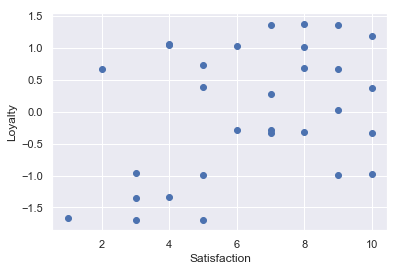

In [3]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Select the features (without standardization)

In [4]:
x = data.copy()

### Clustering results

In [5]:
kmeans = KMeans(2) 
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x) 

Seems the algorithm ONLY cares about Satisfaction

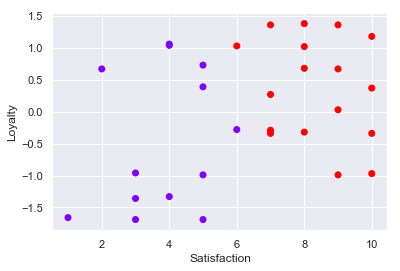

In [7]:
plt.scatter(data_with_clusters['Satisfaction'], data_with_clusters['Loyalty'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Standardize the feature 

In [8]:
from sklearn import preprocessing

In [9]:
x_scaled = preprocessing.scale(x)

### The Elbow method 

In [10]:
wcss = []
number_of_clusters = range(1,10)

for i in number_of_clusters: 
    kmeans = KMeans(i) 
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_) # calculate the wcss using inertia_ method

wcss

[59.99999999999999,
 29.818973034723147,
 17.913349527387965,
 10.247181805928424,
 7.792695153937187,
 6.569489487091783,
 5.326631124753927,
 4.352037765292863,
 3.6879759638524665]

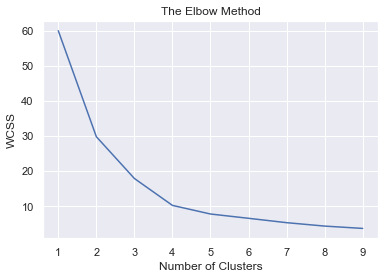

In [11]:
plt.plot(number_of_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

### Exploring clustering solutions with different # of clusters

In [12]:
kmeans = KMeans(4)

In [13]:
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x_scaled) 

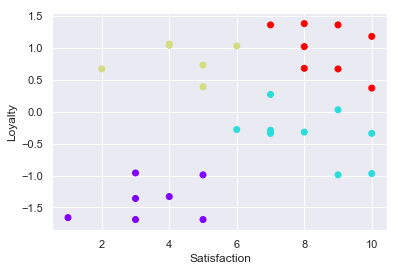

In [14]:
plt.scatter(data_with_clusters['Satisfaction'], data_with_clusters['Loyalty'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Plot without k-means using heatmap 

Heatmap is not quite scalable when we have huge number of observations

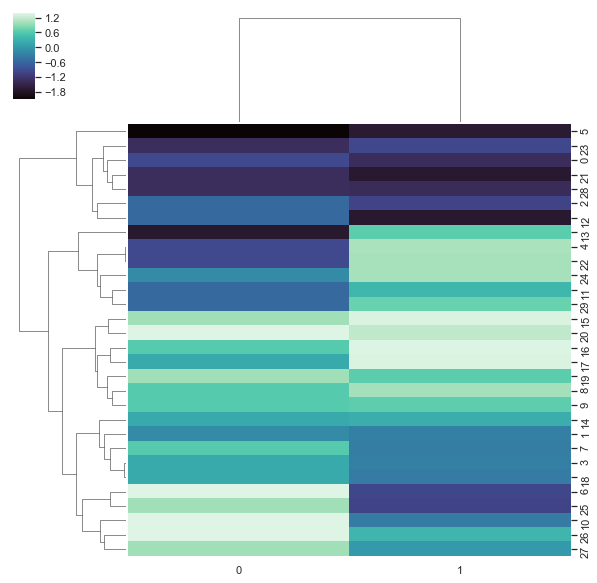

In [16]:
sns.clustermap(x_scaled, cmap='mako')